<a href="https://colab.research.google.com/github/mandarvshinde/CVD_Analysis/blob/main/heartdisease_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load Data**  

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/mandarvshinde/datasets/main/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


##**Data Frame Content and Structure**

In [81]:
#Index, Column Name, Not-Null Count, and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
#Number of rows and columns
df.shape

(303, 14)

In [83]:
print('The number of rows in the dataframe =', df.shape[0] )
print('The number of columns in the dataframe =', df.shape[1] )

The number of rows in the dataframe = 303
The number of columns in the dataframe = 14


In [84]:
#Number of values for target 0 and 1 (0-NO CVD 1 - CVD)
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [85]:
#count the number of duplicate rows
df.duplicated().sum()

1

In [87]:
#remove duplicate rows (no duplicates but still runing it for understanding)
df.drop_duplicates(inplace = True)

In [88]:
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
298,299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
299,300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
300,301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [89]:
#Measures of central tendencies
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000
mean,54.421,0.682,0.964,131.603,246.500,0.149,0.526,149.570,0.328,1.043,1.397,0.719,2.315,0.543
std,9.048,0.466,1.032,17.563,51.753,0.357,0.526,22.904,0.470,1.161,0.616,1.007,0.613,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,133.250,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.500,1.000,1.000,130.000,240.500,0.000,1.000,152.500,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.750,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [90]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##**Measures of Central Tendencies**

In [92]:
#Measures of central tendencies
pd.set_option('display.float_format', lambda x: '%.3f' %x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
sex,302.000,0.682,0.466,0.000,0.000,1.000,1.000,1.000
cp,302.000,0.964,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
restecg,302.000,0.526,0.526,0.000,0.000,1.000,1.000,2.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200


#**Filter Data**

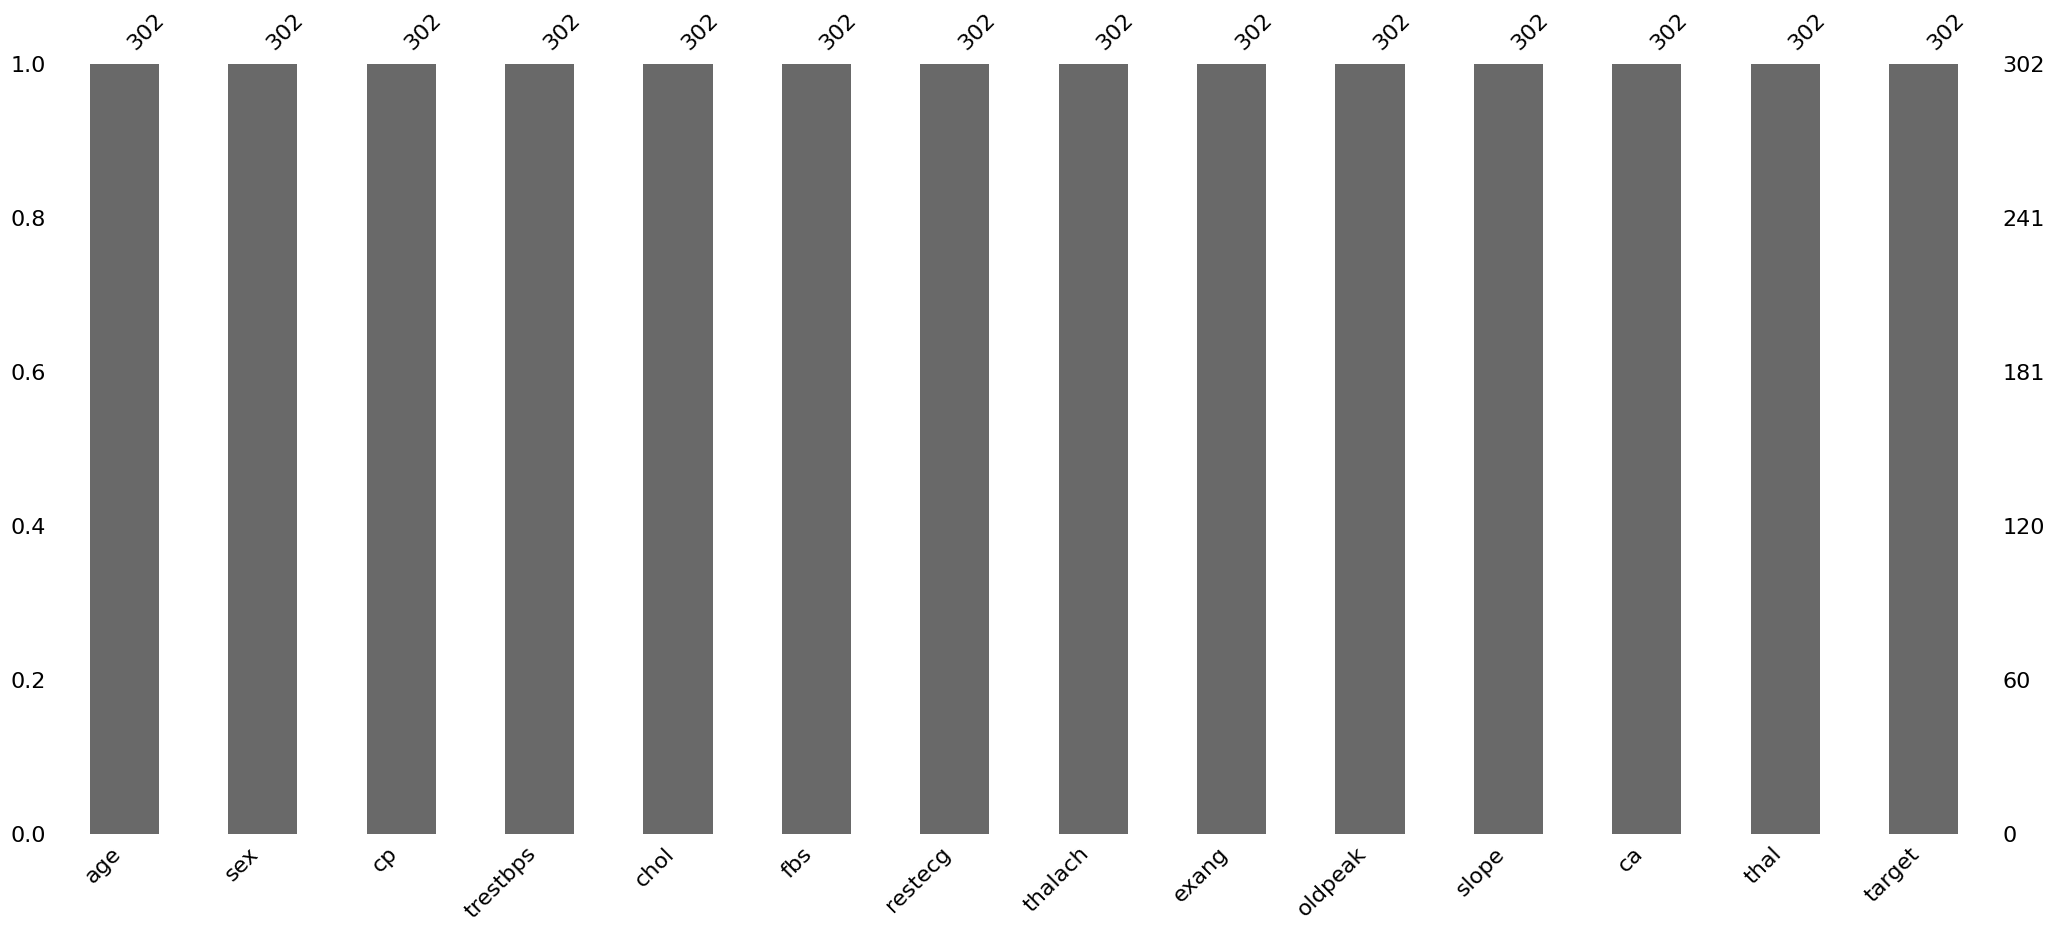

In [93]:
msno.bar(df)
plt.show()

#**Exploratory Data Analysis**

In [94]:
df.duplicated().sum()

0

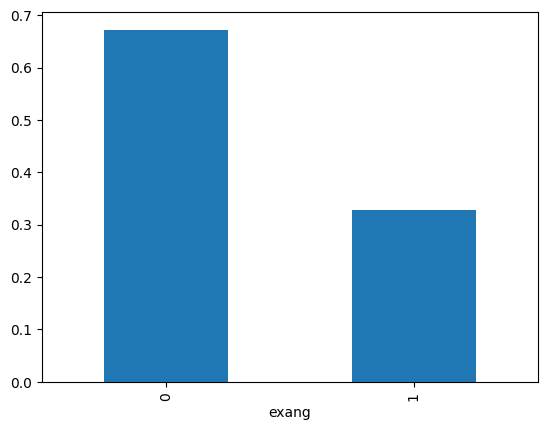

In [95]:
df['exang'].value_counts(normalize=True).plot(kind='bar')
plt.show()

<Axes: ylabel='age'>

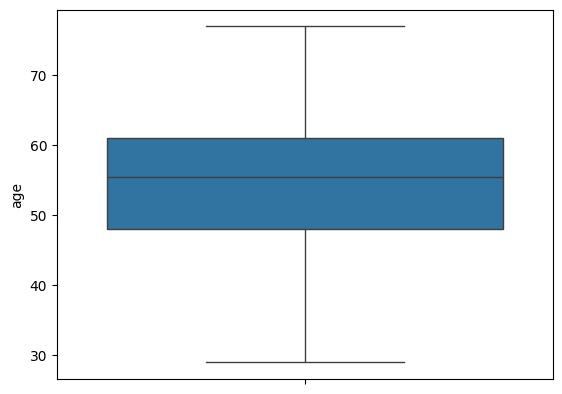

In [96]:
sns.boxplot(df['age'])


In [97]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677,1.042,133.083,261.302,0.125,0.573,151.125,0.229,0.876,1.427,0.552,2.125,0.750
1,53.835,0.927,130.913,239.602,0.160,0.505,148.845,0.374,1.121,1.383,0.796,2.403,0.447


In [98]:
df['sex']=df['sex'].replace(['0','1'],['female','male'])

In [99]:
df.groupby('sex')['target'].mean()

sex
0   0.750
1   0.447
Name: target, dtype: float64

<Axes: xlabel='sex'>

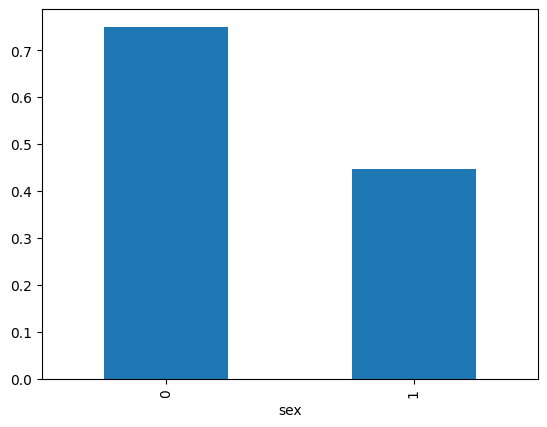

In [100]:
df.groupby('sex')['target'].mean().plot(kind='bar')

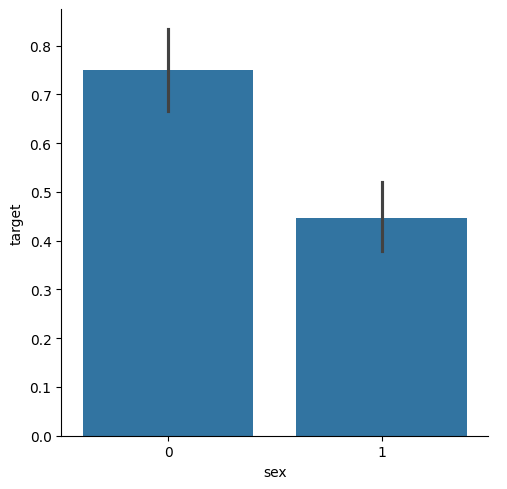

In [101]:
sns.catplot(data=df,y='target', x='sex', kind='bar')

#Observation

####**Occurence of CVD accross ages**

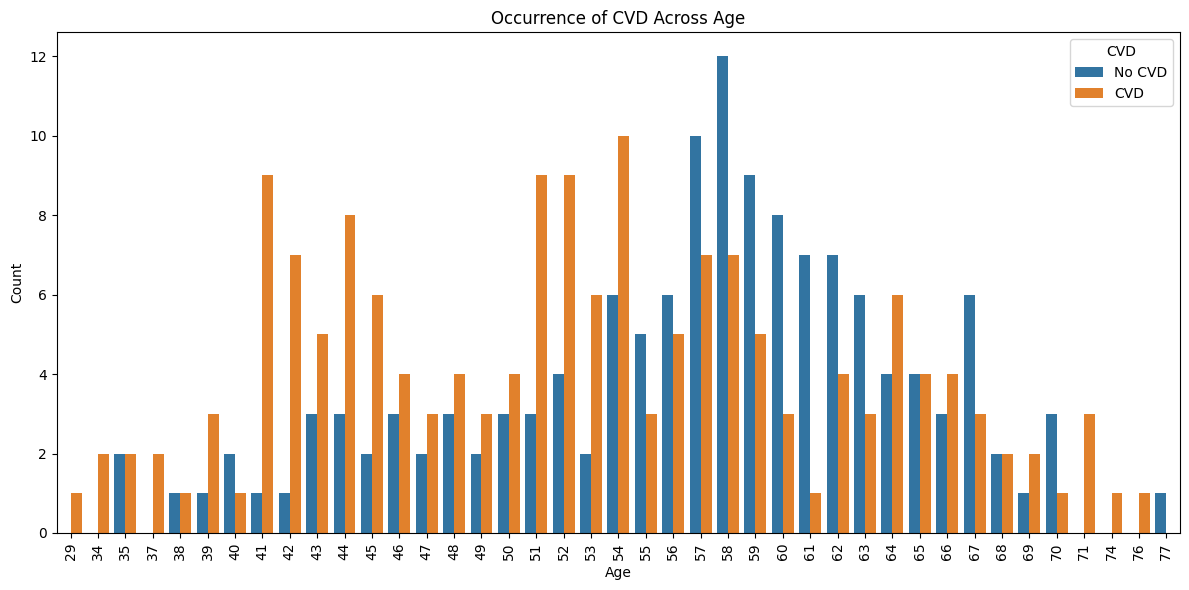

In [102]:
# Specify the target variable and age variable
target_var = 'target'
age_var = 'age'

# Create a bar plot to show occurrence of CVD across age groups
plt.figure(figsize=(12, 6))
sns.countplot(x=age_var, hue=target_var, data=df)
plt.title('Occurrence of CVD Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No CVD', 'CVD'])

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

###**Composition of overall patients with respect to gender**

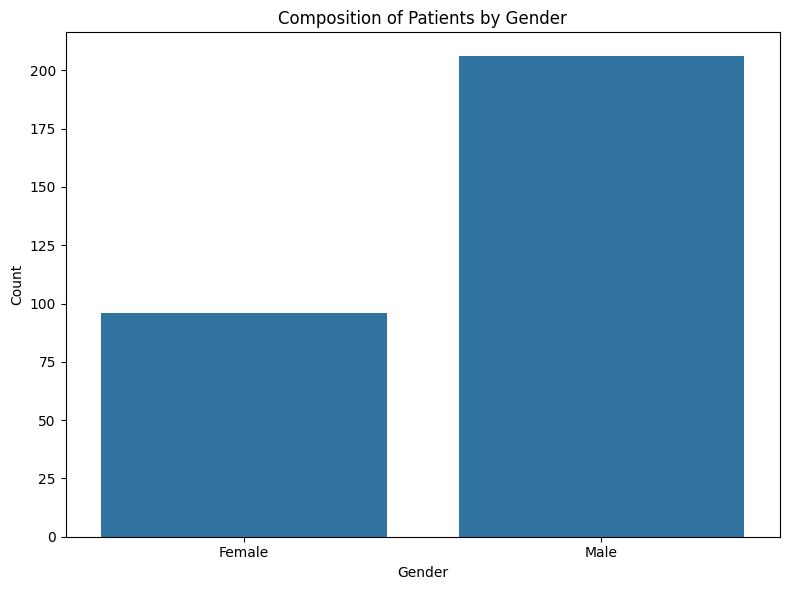

In [103]:
# Specify the variable for gender
gender_var = 'sex'  # Assuming 'sex' represents gender in the dataset

# Create a count plot to study the composition of patients by gender
plt.figure(figsize=(8, 6))
sns.countplot(x=gender_var, data=df)
plt.title('Composition of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Set the x-axis labels for better interpretation
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

###**Detect heart attack based on anomalies in Resting Blood Pressure of the patient**

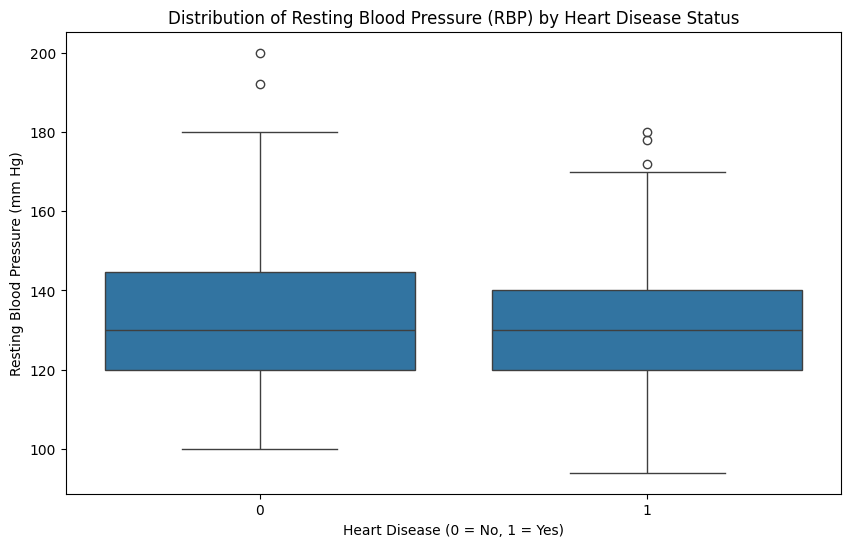

In [104]:
# Define the target variable indicating the presence of heart disease
target_var = 'target'  # Assuming 'target' indicates the presence of heart disease (1 = Yes, 0 = No)

# Define the variable for Resting Blood Pressure (RBP)
rbp_var = 'trestbps'  # Assuming 'trestbps' represents Resting Blood Pressure in the dataset

# Plotting a boxplot to visualize the distribution of RBP by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_var, y=rbp_var, data=df)
plt.title('Distribution of Resting Blood Pressure (RBP) by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')

plt.show()

##**Relationship between Cholesterol levels and our target variable**

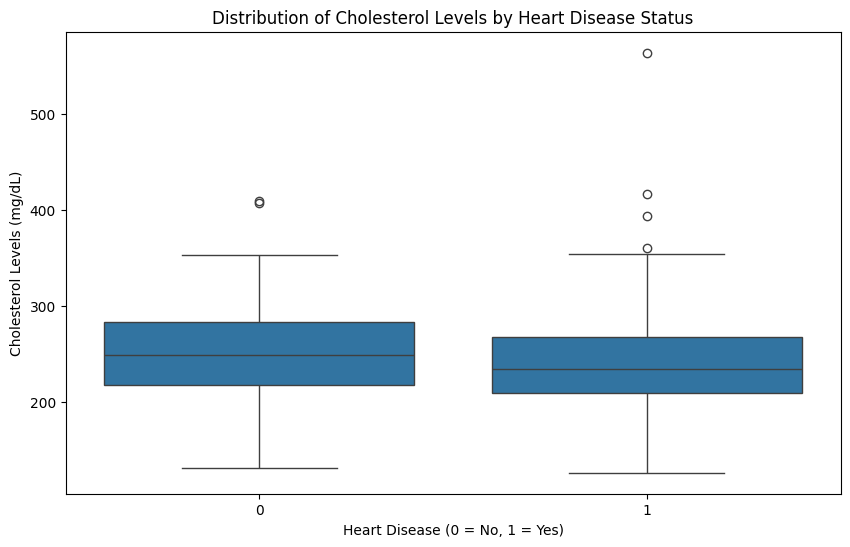

In [105]:
# Define the target variable indicating the presence of heart disease
target_var = 'target'  # Assuming 'target' indicates the presence of heart disease (1 = Yes, 0 = No)

# Define the variable for Cholesterol levels (cholesterol)
cholesterol_var = 'chol'  # Assuming 'chol' represents Cholesterol levels in the dataset

# Plotting a boxplot to visualize the distribution of Cholesterol levels by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_var, y=cholesterol_var, data=df)
plt.title('Distribution of Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (mg/dL)')

plt.show()

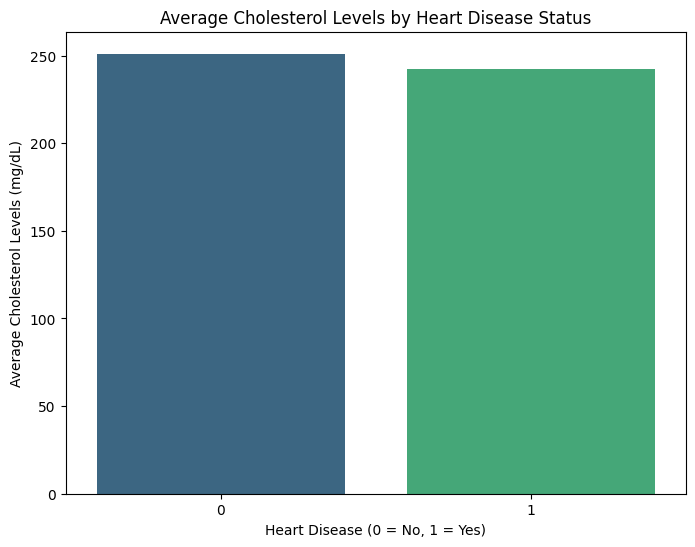

In [106]:
# Define the target variable indicating the presence of heart disease
target_var = 'target'  # Assuming 'target' indicates the presence of heart disease (1 = Yes, 0 = No)

# Define the variable for Cholesterol levels (cholesterol)
cholesterol_var = 'chol'  # Assuming 'chol' represents Cholesterol levels in the dataset

# Group the data by the target variable and calculate the average cholesterol levels
avg_cholesterol_by_target = df.groupby(target_var)[cholesterol_var].mean().reset_index()

# Plotting a grouped bar plot to visualize the average Cholesterol levels by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=target_var, y=cholesterol_var, data=avg_cholesterol_by_target, hue=target_var, palette='viridis', legend=False)
plt.title('Average Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Average Cholesterol Levels (mg/dL)')

plt.show()

##**Concluded about the relationship between peak exercising and occurrence of heart attack**

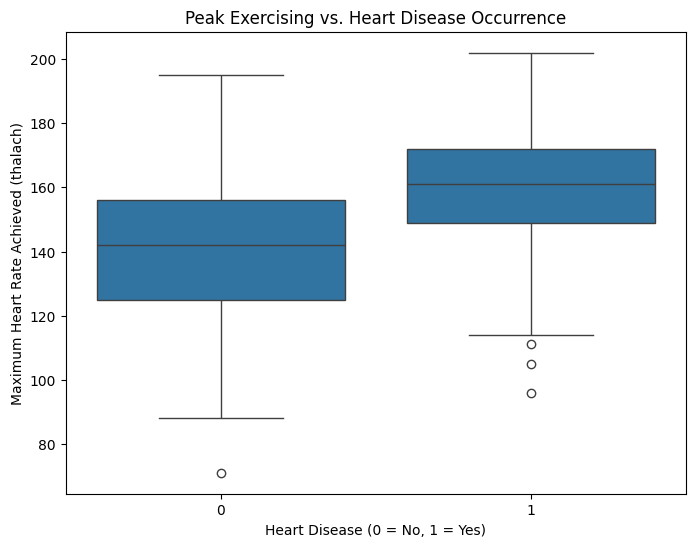

T-test results - t-statistic: 8.01, p-value: 0.0000


In [107]:
# Define variables
peak_exercise_var = 'thalach'  # Maximum heart rate achieved during peak exercise
target_var = 'target'  # Heart disease occurrence (1 = Yes, 0 = No)

# Plotting a box plot to compare peak exercise values by heart disease status
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_var, y=peak_exercise_var, data=df)
plt.title('Peak Exercising vs. Heart Disease Occurrence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

# Statistical analysis (e.g., t-test)
from scipy.stats import ttest_ind

heart_disease_yes = df[df[target_var] == 1][peak_exercise_var]
heart_disease_no = df[df[target_var] == 0][peak_exercise_var]

t_stat, p_val = ttest_ind(heart_disease_yes, heart_disease_no)
print(f"T-test results - t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

##**Is thalassemia a major cause of CVD?**

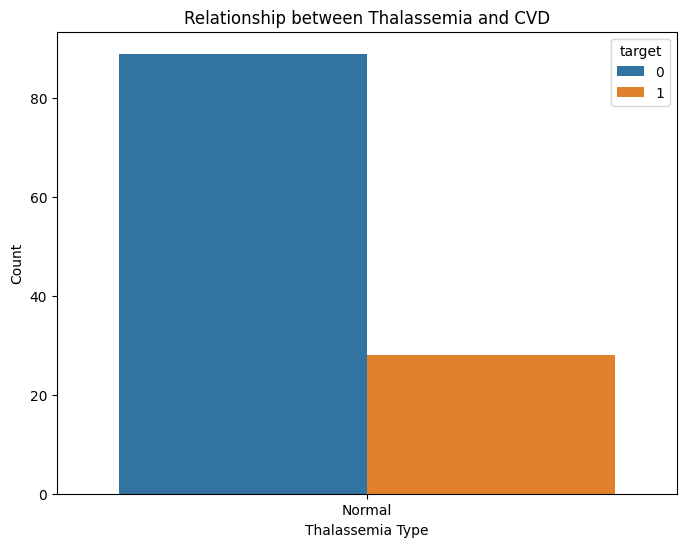

Proportion of CVD cases for each thalassemia type:
target     0     1
thal              
Normal 0.761 0.239


In [108]:
# Filter relevant columns (thal and target)
df_subset = df[['thal', 'target']]

# Replace thalassemia codes with descriptive labels using .loc
thalassemia_map = {3: 'Normal', 6: 'Fixed Defect', 7: 'Reversible Defect'}
df_subset.loc[:, 'thal'] = df_subset['thal'].map(thalassemia_map)

# Create a cross-tabulation of thalassemia and CVD
thalassemia_cvd_cross = pd.crosstab(df_subset['thal'], df_subset['target'])

# Visualize the relationship using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=df_subset)
plt.title('Relationship between Thalassemia and CVD')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()

# Calculate proportions of CVD cases for each thalassemia type
thalassemia_counts = df_subset['thal'].value_counts()
thalassemia_cvd_proportions = thalassemia_cvd_cross.div(thalassemia_counts, axis=0)

# Print the proportions
print("Proportion of CVD cases for each thalassemia type:")
print(thalassemia_cvd_proportions)

##**Other factors determining occurences of CVD**

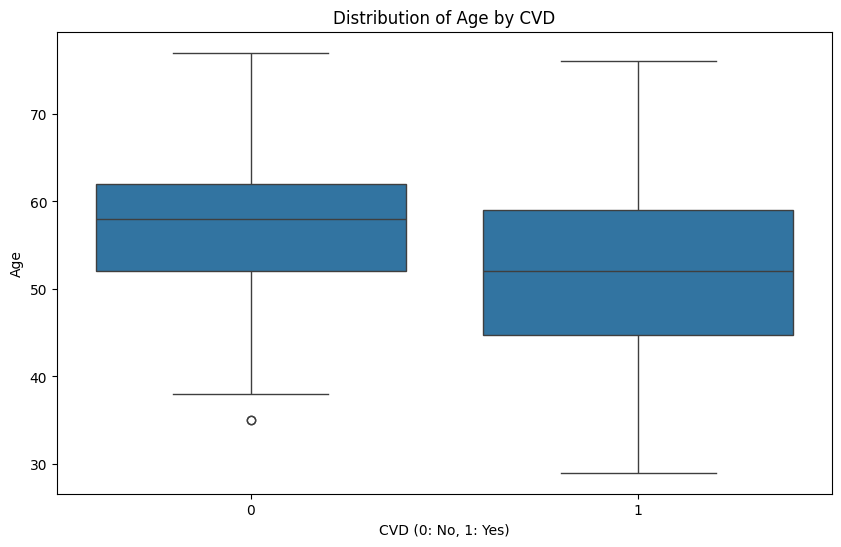

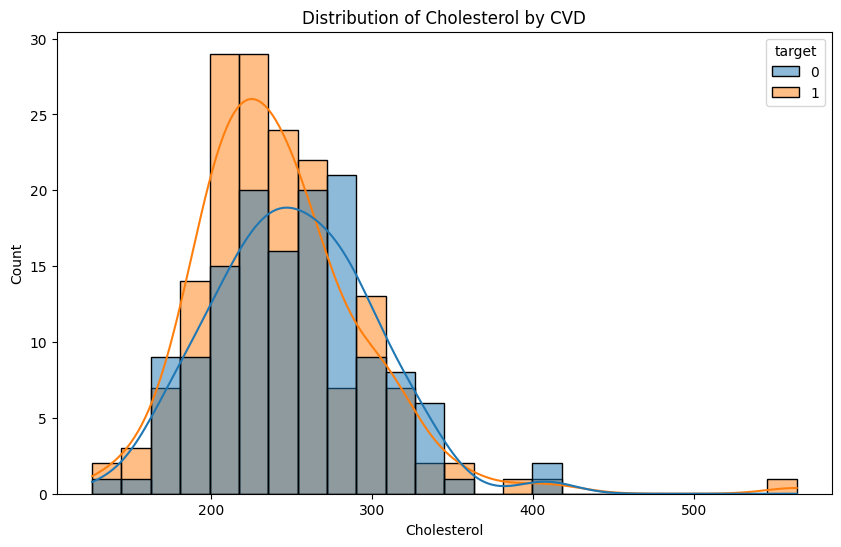

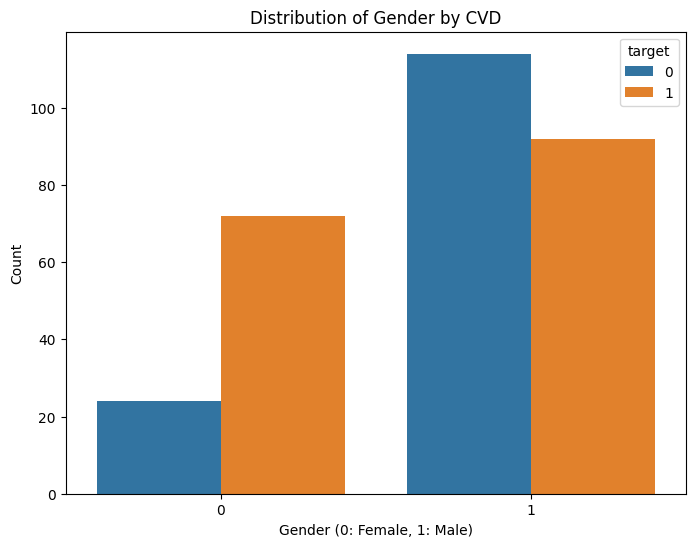

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Explore relationship between age and CVD
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribution of Age by CVD')
plt.xlabel('CVD (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

# Explore relationship between cholesterol and CVD
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='target', kde=True)
plt.title('Distribution of Cholesterol by CVD')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# Explore relationship between sex and CVD
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Distribution of Gender by CVD')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Prepare data for logistic regression model
X = df.drop('target', axis=1)  # Independent variables
y = df['target']                # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model with adjusted parameters
model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# View classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

##**Use a pair plot to understand the relationship between all the given variables**

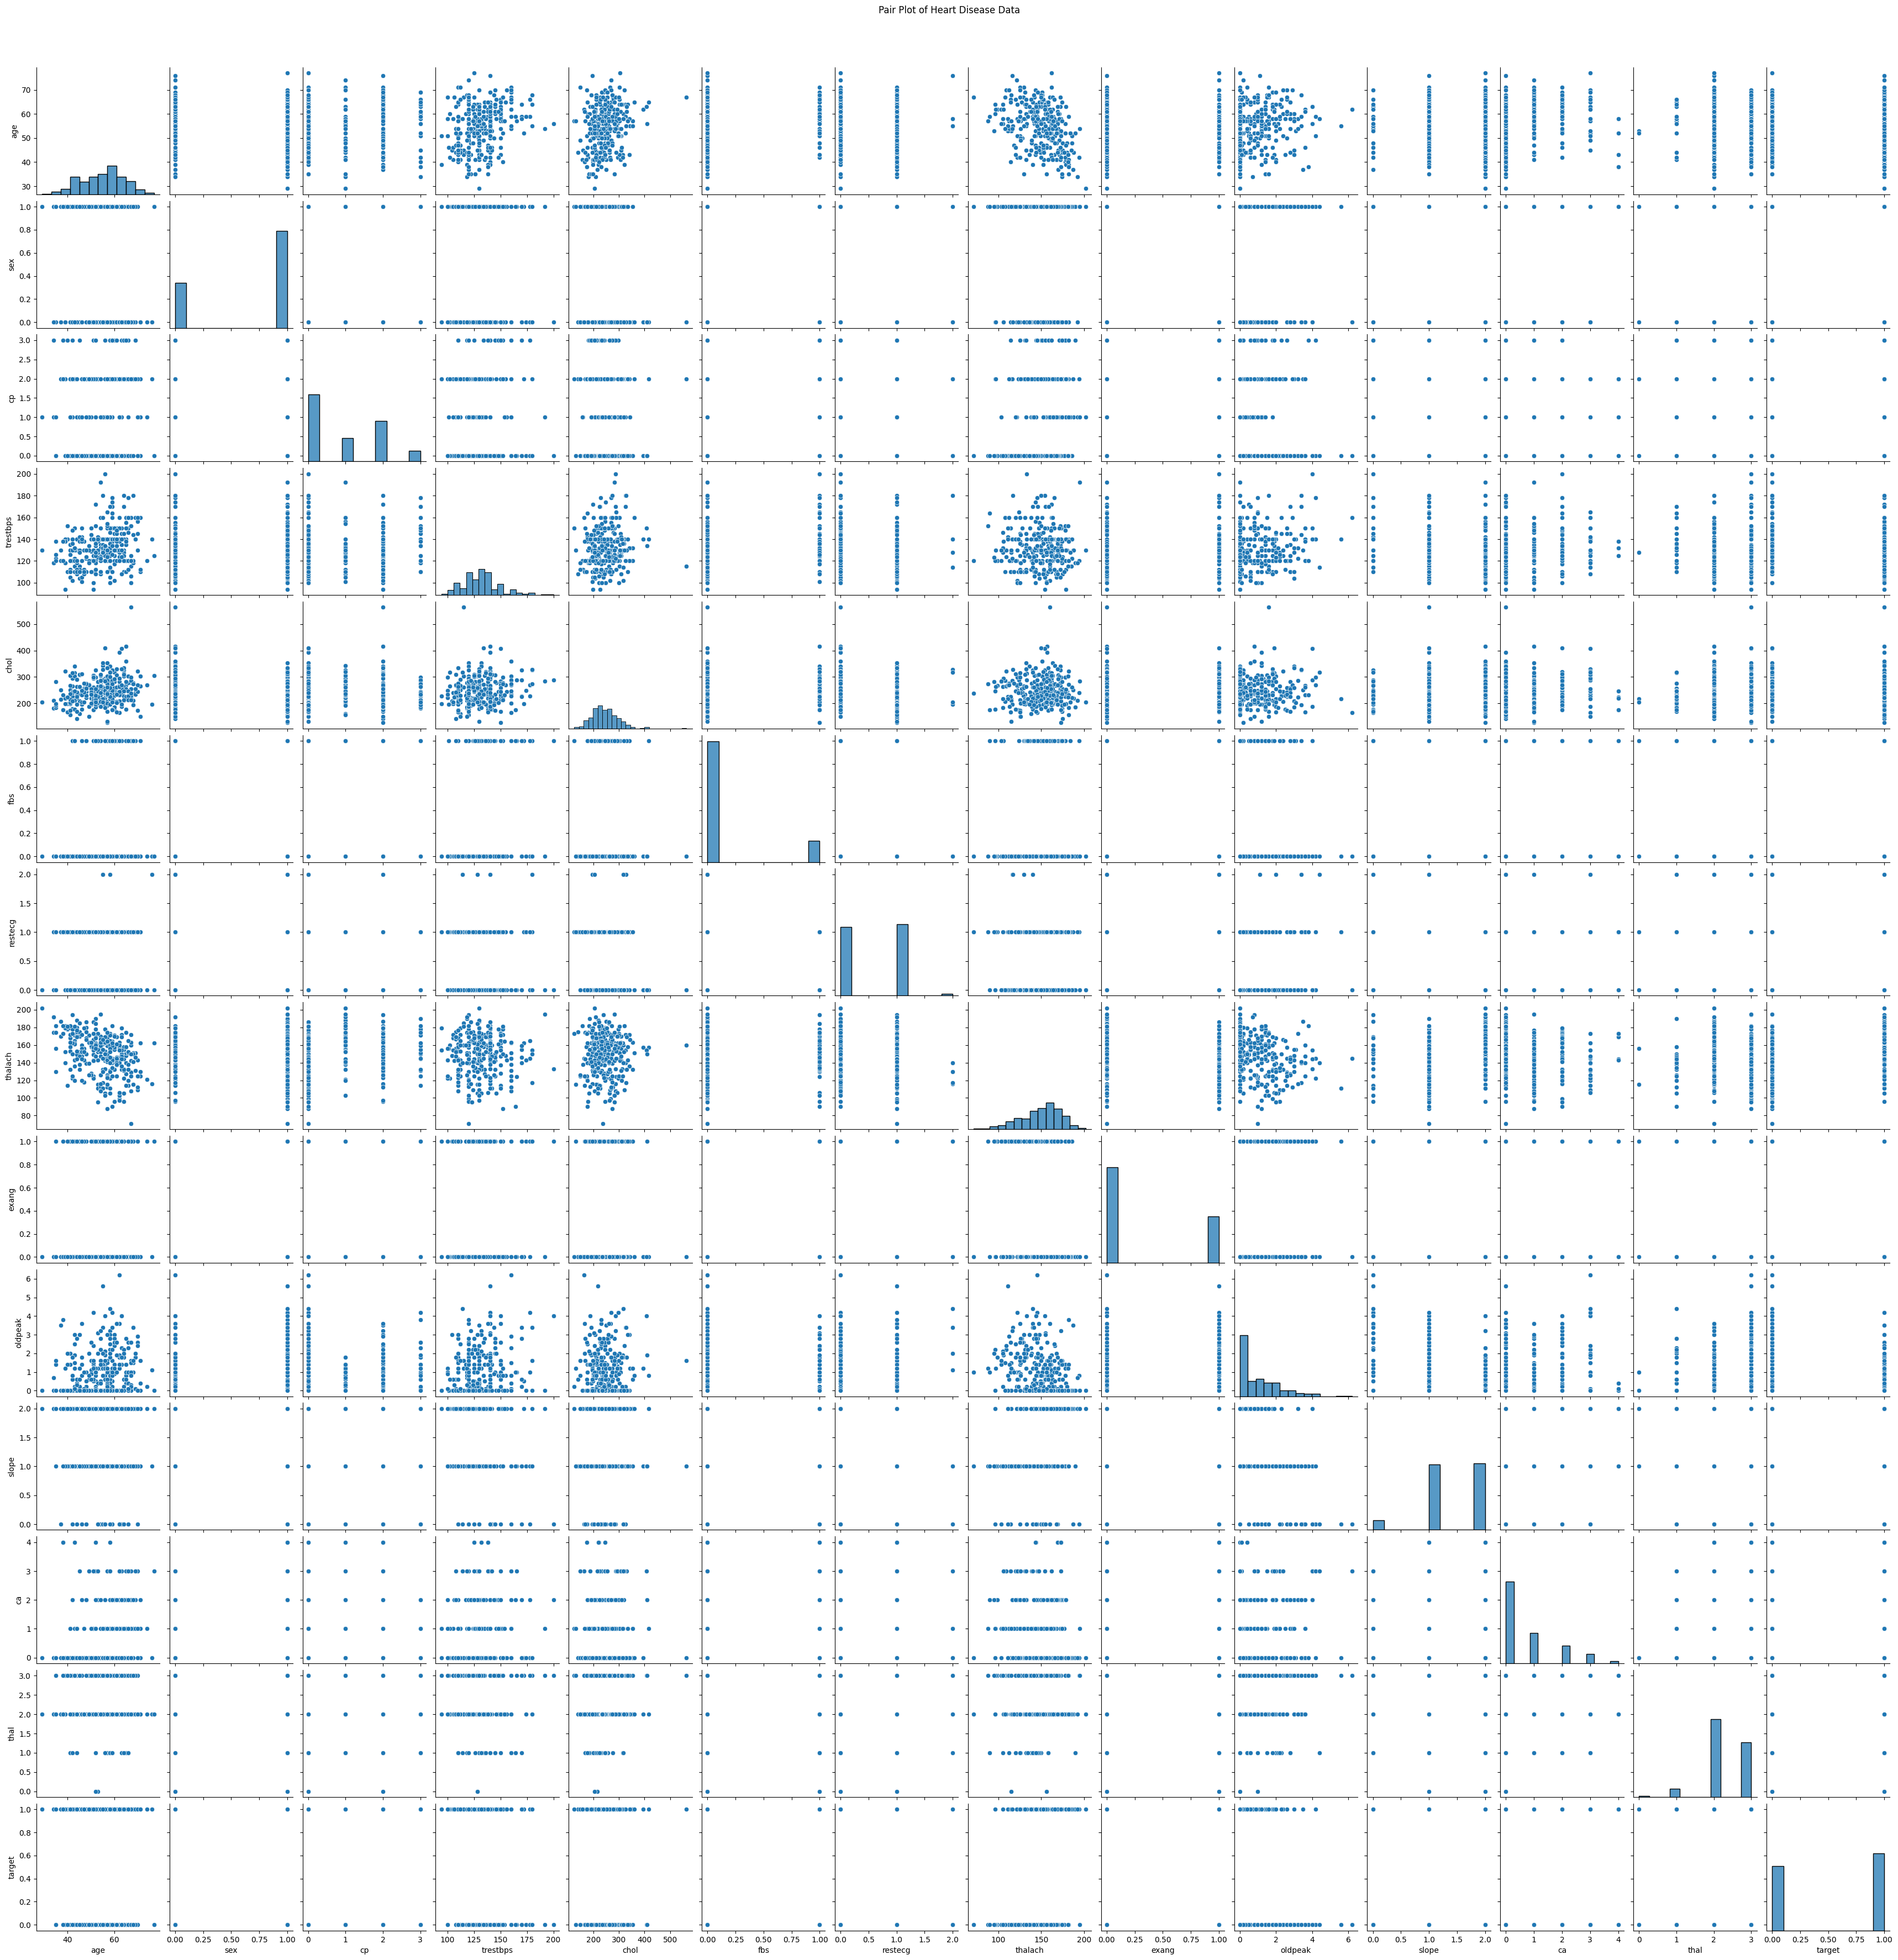

In [ ]:
# Drop any non-numeric columns (if necessary) for the pair plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Create a pair plot
sns.pairplot(df_numeric)
plt.suptitle("Pair Plot of Heart Disease Data", y=1.02)
plt.show()

##**Imbalance in target variable**

In [110]:
#distribution in target variable
df['target'].value_counts(normalize=True)

target
1   0.543
0   0.457
Name: proportion, dtype: float64

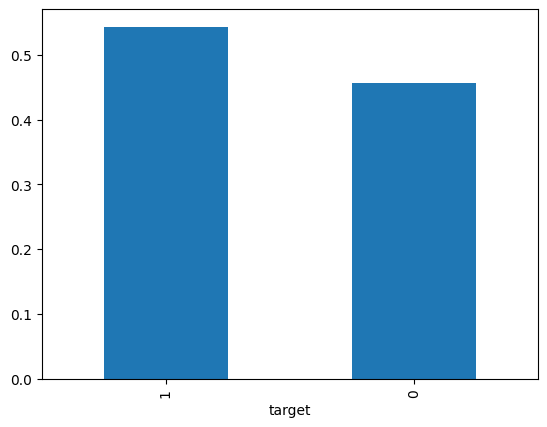

In [111]:
#visualize the distribution in target variable bar chart
df['target'].value_counts(normalize=True).plot(kind='bar')
plt.show()

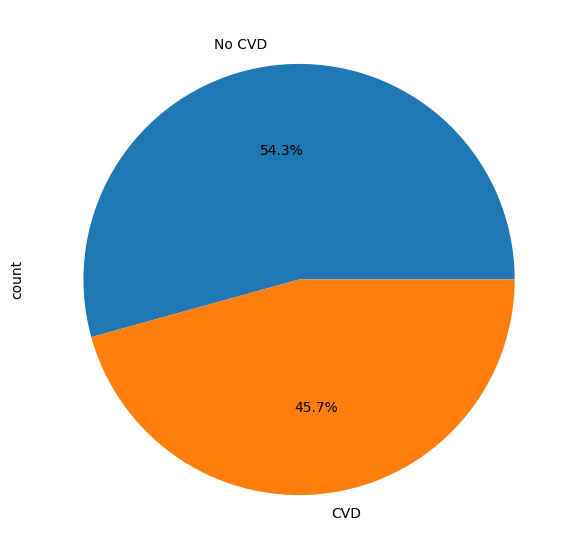

In [112]:
#visualize the distribution in target variable pie chart
plt.figure(figsize=(10,7))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No CVD', 'CVD'])
plt.show()

#**Data Preparation**

##**Data Separation as X and Y**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [115]:
y=df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [116]:
x=df.drop('target', axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3


##**Data Splitting**

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
41,48,1,1,130,245,0,0,180,0,0.200,1,0,2
165,67,1,0,160,286,0,0,108,1,1.500,1,3,2
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3
59,57,0,0,128,303,0,0,159,0,0.000,2,1,2
167,62,0,0,140,268,0,0,160,0,3.600,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.200,1,0,2
53,44,0,2,108,141,0,1,175,0,0.600,1,0,2
79,58,1,2,105,240,0,0,154,1,0.600,1,0,3
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0


In [118]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
41,48,1,1,130,245,0,0,180,0,0.200,1,0,2
165,67,1,0,160,286,0,0,108,1,1.500,1,3,2
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3
59,57,0,0,128,303,0,0,159,0,0.000,2,1,2
167,62,0,0,140,268,0,0,160,0,3.600,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.200,1,0,2
53,44,0,2,108,141,0,1,175,0,0.600,1,0,2
79,58,1,2,105,240,0,0,154,1,0.600,1,0,3
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0


In [119]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,62,1,0,120,267,0,1,99,1,1.800,1,2,3
206,59,1,0,110,239,0,0,142,1,1.200,1,1,3
112,64,0,2,140,313,0,1,133,0,0.200,2,0,3
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2
46,44,1,2,140,235,0,0,180,0,0.000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,57,1,2,128,229,0,0,150,0,0.400,1,1,3
243,57,1,0,152,274,0,1,88,1,1.200,1,1,3
204,62,0,0,160,164,0,0,145,0,6.200,0,3,3
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2


In [121]:
y_train

41     1
165    0
111    1
59     1
167    0
      ..
66     1
53     1
79     1
281    0
8      1
Name: target, Length: 241, dtype: int64

In [ ]:
y_test

69     1
300    0
220    0
134    1
7      1
      ..
1      1
23     1
56     1
75     1
252    0
Name: target, Length: 61, dtype: int64

#**Machine Learning Model Building**

##**Logistic Regression**

###**Training Model**

In [122]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 (or higher if needed)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [123]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize Logistic Regression model on scaled data
model = LogisticRegression()

# Train the model on scaled data
model.fit(x_train_scaled, y_train)

LogisticRegression()

###**Applying the model for prediction**

In [ ]:
y_model_train_pred = model.predict(x_train)
y_model_test_pred = model.predict(x_test)

In [125]:
print(y_model_train_pred, y_model_test_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0] [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


###**Evaluate Model Performance**

In [126]:
y_train

41     1
165    0
111    1
59     1
167    0
      ..
66     1
53     1
79     1
281    0
8      1
Name: target, Length: 241, dtype: int64

In [127]:
y_model_train_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[24  5]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


ROC AUC Score: 0.9289


ROC AUC Score: 0.9289


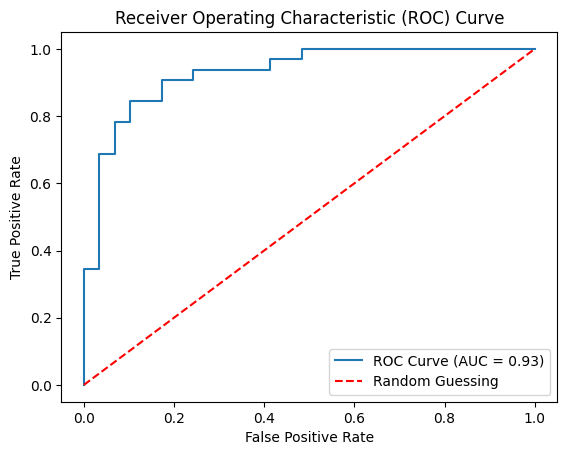

In [132]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="r", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [134]:
# Preprocessing: Select features (X) and target variable (y)
X = df.drop('target', axis=1)  # Features (independent variables)
y = df['target']                # Target variable (dependent variable)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
[[24  5]
 [ 6 26]]
